# Measuring distance dependent frequency shift
- external FG to drive probe piezo


In [4]:
#%matplotlib.widget
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_dir = r'C:\Users\Characterization\B26_scanning_probe\data\230207-11_30_00_AFM_approach_curve' 
os.listdir(data_dir)

['meas_plotter_20230207_112004.png',
 'meas_plotter_20230207_112006.txt',
 'meas_plotter_20230207_112117.txt',
 'meas_plotter_20230207_112140.png',
 'meas_plotter_20230207_112147.png',
 'meas_plotter_20230207_112305.png']

In [17]:
d = np.loadtxt(
    r'C:\Users\Characterization\B26_scanning_probe\data\230207-11_30_00_AFM_approach_curve\meas_plotter_20230207_112117.txt',
    skiprows=9,
    delimiter=";")

In [18]:
np.shape(d)

(6777, 2)

In [19]:
6747/3

2249.0

In [20]:
# seperate out the 
_i = np.where(d[:,0]==0)[0]
print(_i)
aux1 = np.asarray(d[:_i[0],:]).T
aux2 = np.asarray(d[_i[0]+1:_i[1],:]).T
f = np.asarray(d[_i[1]+1:-1,:]).T

[2258 4517 6776]


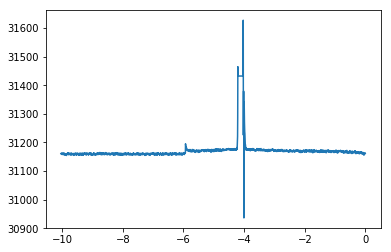

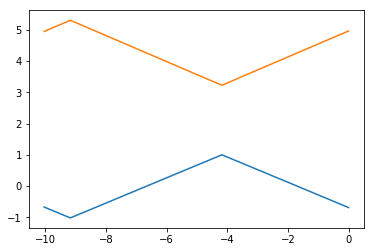

In [21]:
plt.plot(*f)
plt.show()
plt.plot(*aux1)
plt.plot(*aux2)

### calculating df

## chop up sine into single ramps
- fit sine wave
- looking at maxima and minima

In [22]:
assert f.shape == aux1.shape == aux2.shape

In [116]:
df = f[1,:]-31.16e3
t = f[0,:]

(-7, -3)

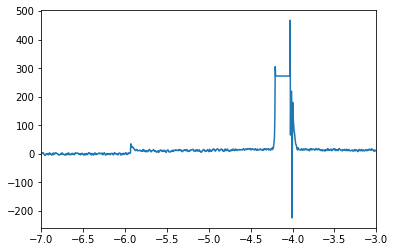

In [117]:
plt.plot(t,df)
plt.xlim((-7,-3,))

### crop out a single approach

In [118]:
t_range = (-6.5,-3.5)
cp_mask = (t>t_range[0]) & (t<t_range[1])
t_cp = t[cp_mask]
df_cp = df[cp_mask]
aux2_cp = aux2[1,:][cp_mask]

# make time start from 0s
t_cp = t_cp - t_cp.min()

# convert voltage to displacement
aux2_cp_norm = aux2_cp - aux2_cp.min()
z_cp = aux2_cp_norm *15*6.1/150 # in um

ta = 0.56
tb = 2.265

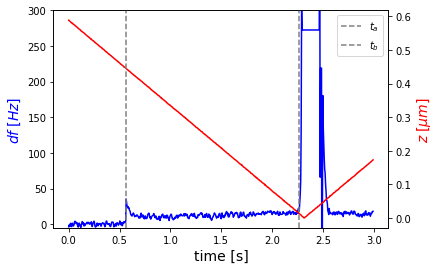

In [125]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(t_cp,df_cp,color="b")
# set x-axis label
ax.set_xlabel("time [s]", fontsize = 14)
# set y-axis label
ax.set_ylabel("$df\;[Hz]$",color="b",fontsize=14)
ax.set_yscale("linear")
ax.set_ylim((-5,300))
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t_cp,z_cp,color="r")
ax2.set_ylabel(r"$z\;[\mu m]$",color="r",fontsize=14)


# plot vertical lines
plt.axvline(x = ta, color = 'grey',ls = "dashed", label = r'$t_a$')
plt.axvline(x = tb, color = 'grey',ls = "dashed", label = r'$t_b$')


# focus on vertical line
t_foc = ta
delta = 0.01


plt.legend()
plt.show()
# save the plot as a file
fig.savefig("plots/20230206_qnami_approach",
            format='png',
            dpi=300,
            bbox_inches='tight')

### calculte tip amplitude
- setting on controller:
    - phase: 5
    - gain: 5
    - amp: 5
    - loc. osc.: 5.45
  
 ##### crop out ta -tb

In [126]:
app_mask  = (t_cp>ta) & (t_cp<tb)
t_app = t_cp[app_mask]
df_app = df_cp[app_mask]
z_app = z_cp[app_mask]

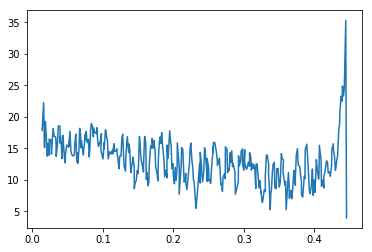

In [127]:
plt.plot(z_app,df_app)

In [128]:
tip_amplitude = 2*abs(z_app.max()-z_app.min())
print(tip_amplitude)

0.8637827115321998


### plot desplacement vs df

(0, 300)

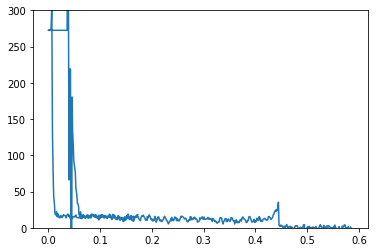

In [130]:
plt.plot(z_cp,df_cp)
plt.ylim((0,300))